# 環境の設定

In [1]:
from blindcliftwalk import BlindCliftwalk

# ゴールまでの距離
nb_step = 20
#nb_step = 10

# ゴールの数
nb_goals = 3
#nb_goals = 1

env = BlindCliftwalk(nb_step, nb_goals)

In [2]:
import numpy as np

np.random.seed(seed=50)
env.set_ground_truth()
env.ground_truth

array([[2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

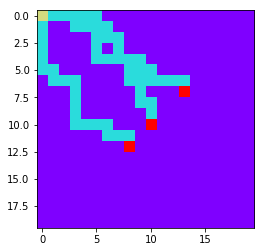

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(env.ground_truth, 'rainbow', interpolation='nearest')
#plt.savefig('ground_truth.png')

# 方策勾配法（REINFORCEアルゴリズム）で方策を学習する

- ガウス分布型の方策を使用する。
$$¥pi(a|s) =¥exp ¥Bigg( - ¥frac{(s-Wa)^2}{2¥sigma^2} ¥Bigg)$$

In [4]:
import tensorflow as tf

t_action = tf.placeholder(tf.float32, [None, 2], name='action')
t_state = tf.placeholder(tf.float32, [None, 2], name='state')
t_reward = tf.placeholder(tf.float32, [None, 1], name='reward')

#model = 'one-layer'
model = 'two-layers'

sess = tf.InteractiveSession()

if model=='one-layer':
#    step = tf.group(t_weights.assign(t_weights_))
    compute_gradient  = tf.group(t_weights_grad_sum.assign(t_weights_grad))
elif model=='two-layers':
    nb_nodes = 100
    W1 = tf.Variable(tf.random_normal([2, nb_nodes], stddev=np.sqrt(2 / (2 + nb_nodes))), name='W1')
    W2 = tf.Variable(tf.random_normal([nb_nodes, 2], stddev=np.sqrt(2 / (nb_nodes + 2))), name='W2')
    b1 = tf.Variable(tf.random_normal([nb_nodes]), name='b1')
    b2 = tf.Variable(tf.random_normal([2]), name='b2')
    
    h1 = tf.nn.relu(tf.nn.bias_add(tf.matmul(t_state, W1),b1))
    t_policy_mean = tf.nn.softmax(tf.nn.bias_add(tf.matmul(h1, W2),b2))
    t_policy = tf.exp(-0.5 * tf.square(t_action - t_policy_mean))
#    t_policy = tf.square(t_action - t_policy_mean)

#    t_weights_grad1 =  tf.gradients(t_reward * tf.log(t_policy), W1)[0]
#    t_weights_grad2 =  tf.gradients(t_reward * tf.log(t_policy), W2)[0]
#    t_bias_grad1 =  tf.gradients(t_reward * tf.log(t_policy), b1)[0]
#    t_bias_grad2 =  tf.gradients(t_reward * tf.log(t_policy), b2)[0]
    t_weights_grad1 =  -tf.gradients(t_reward * tf.log(t_policy), W1)[0]
    t_weights_grad2 =  -tf.gradients(t_reward * tf.log(t_policy), W2)[0]
    t_bias_grad1 =  -tf.gradients(t_reward * tf.log(t_policy), b1)[0]
    t_bias_grad2 =  -tf.gradients(t_reward * tf.log(t_policy), b2)[0]
    t_policy_gradient = [
        (t_weights_grad1, W1),
        (t_weights_grad2, W2),
        (t_bias_grad1, b1),
        (t_bias_grad2, b2)
    ]
    train_step = tf.train.AdamOptimizer(learning_rate=1e-3).apply_gradients(t_policy_gradient)
tf.global_variables_initializer().run()

/Users/ruhokondo/Programming/anaconda3/envs/dl35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/ruhokondo/Programming/anaconda3/envs/dl35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
#  episode数 = nb_epoch * nb_mc
nb_epoch = 1000

# MC計算に使うepisode数。パラメータ更新回数は　nb_episode　/　nb_mc　になる
nb_mc = 100

# ゴール到達後のstate valueの保存間隔
save_interval = 1000

# ε-greedyのハイパーパラメータ
epsilon = 0.3

In [6]:
def gumbel_sampling(prob):
    rand = np.random.random(len(prob))
    g = -np.log(-np.log(rand))
    return np.argmax(g+np.log(prob))

def epsilon_greedy(sess, t_policy_mean, state, env, epsilon):
    if np.random.random(1) > epsilon:
        action_prob = t_policy_mean.eval({t_state:np.expand_dims(state,0)}, sess)[0] + np.finfo(np.float32).eps
    else:
        action_prob = np.random.random(2)
    action_prob = action_prob / action_prob.sum()
    action = np.eye(2)[gumbel_sampling(action_prob)].astype(int)
    return action_prob, action

In [8]:
def get_trajectory(sess, env, nb_try=100):
    trajectory = np.zeros_like(env.ground_truth).astype(np.float32)

    for _ in range(nb_try):
        current_state = [0,0]
        status = 1
        while status>=0:

                # policyにしたがって行動を取る（まだ遷移させない）。εはゼロにしておく。
                action_prob, action = epsilon_greedy(sess, t_policy_mean, current_state, env, 0.)

                # 行動に対する報酬と遷移後の状態の計算
                next_state, reward, status = env.do_action(current_state, action)

                # トラジェクトリの記録
                trajectory[current_state[0],current_state[1]] += 1.

                # 状態の遷移（マス目の移動）
                current_state = next_state
    return trajectory

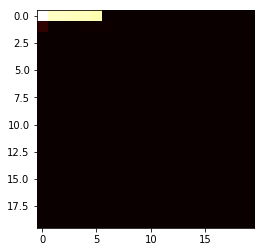

In [9]:
plt.imshow(get_trajectory(sess, env), 'hot')

  0%|          | 0/1000 [00:00<?, ?it/s]

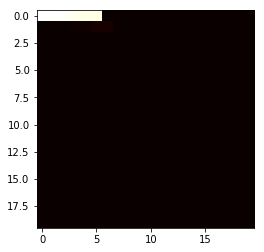

 10%|█         | 100/1000 [00:09<01:22, 10.97it/s]

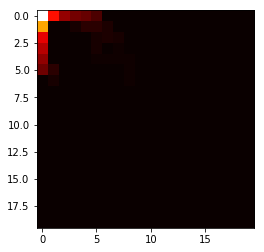

 20%|██        | 200/1000 [00:17<01:11, 11.22it/s]

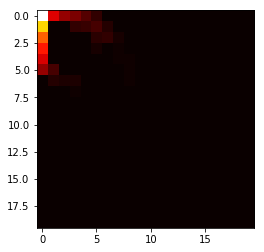

 30%|███       | 300/1000 [00:26<01:02, 11.13it/s]

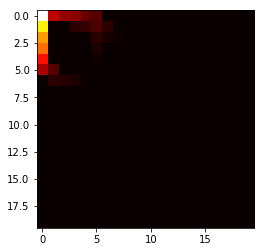

 40%|████      | 400/1000 [00:35<00:53, 11.13it/s]

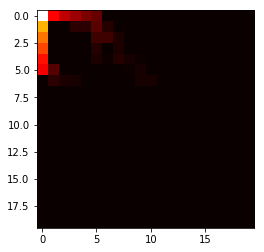

 50%|████▉     | 499/1000 [00:45<00:45, 10.93it/s]

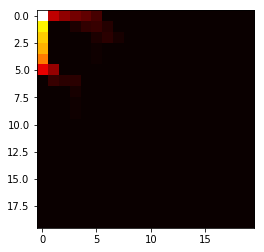

 60%|██████    | 600/1000 [00:55<00:37, 10.79it/s]

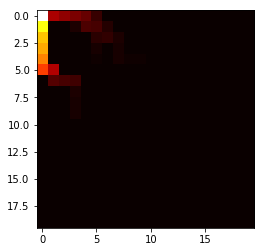

 70%|███████   | 700/1000 [01:05<00:28, 10.61it/s]

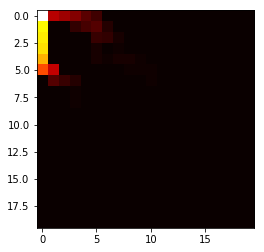

 80%|███████▉  | 799/1000 [01:17<00:19, 10.27it/s]

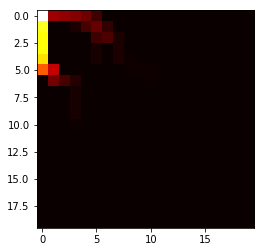

 90%|█████████ | 900/1000 [01:29<00:09, 10.02it/s]

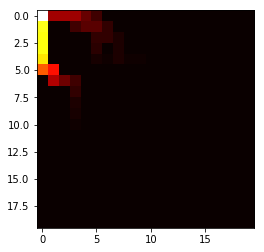

100%|██████████| 1000/1000 [01:41<00:00,  9.83it/s]


In [10]:
from tqdm import tqdm
import copy

isSuccessed = False

temp = []
count = 0
success_history = []
for epoch in tqdm(range(int(nb_epoch))):
    episode_states = []
    episode_actions = []
    episode_rewards = []
    success_count = 0
    if not epoch%100:
        plt.imshow(get_trajectory(sess, env), 'hot')
        plt.show()
#        print()
    for mc_step in range(nb_mc):
        # 状態の初期化（スタート地点に戻る）
        current_state  = np.zeros(2, dtype=int)
    
        status = 0
        while status >= 0:
            # policyにしたがって行動を取る（まだ遷移させない）
            action_prob, action = epsilon_greedy(sess, t_policy_mean, current_state, env, epsilon)

            # 行動に対する報酬と遷移後の状態の計算
            next_state, reward, status = env.do_action(current_state, action)
#            if status==0:
#                reward=1#test
#            if status==1:
#                reward=10#test
            if status==-1:
                reward=-1#test
                
            if not epoch%100 and mc_step==0:
                pass
#                print('s=',current_state,' p=',action_prob,' a=',action,' status=',status)
            
            # エピソード中の遷移前状態、行動、報酬を保存する
            episode_states.append(copy.deepcopy(current_state))
            episode_actions.append(copy.deepcopy(action))
            episode_rewards.append(copy.deepcopy(reward))

            # 状態の遷移（マス目の移動）
            current_state = next_state
            
            if status==1:
                success_count += 1
                isSuccessed = True

    # 方策勾配を計算する
    episode_states = np.array(episode_states)
    episode_actions = np.array(episode_actions)
    episode_rewards = np.array(episode_rewards)
    success_history.append(success_count)
#    _, summary = sess.run(
    sess.run(
#        [train_step, merged_summary_op], 
        [train_step], 
        feed_dict={
            t_action: episode_actions,
            t_state: episode_states,
            t_reward: np.expand_dims(episode_rewards, -1)
        }
    )

#                if isSuccessed:
#                    count += 1
#                    if count==save_interval:
    #                    stacked_q_table.append(np.copy(q_table))
#                        count = 0
    #    if not i%100:
    #        temp.append(x.eval(session=sess))

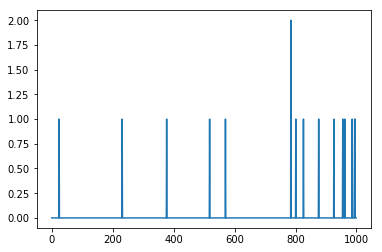

In [11]:
plt.plot(success_history)

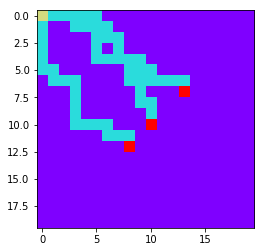

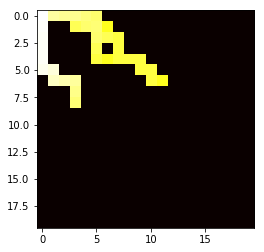

In [14]:
plt.imshow(env.ground_truth, 'rainbow', interpolation='nearest')
plt.show()
plt.imshow(np.log(get_trajectory(sess, env)+np.finfo(np.float32).eps), 'hot')

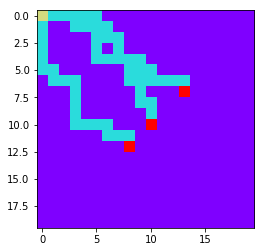

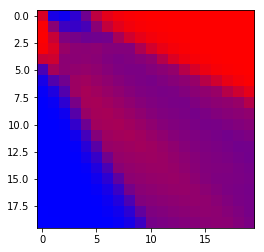

In [13]:
learnt_policy = np.expand_dims(np.zeros_like(env.ground_truth).astype(np.float32), -1)
learnt_policy = np.concatenate([learnt_policy,learnt_policy,learnt_policy],-1)
for s0 in range(env.ground_truth.shape[0]):
    for s1 in range(env.ground_truth.shape[1]):
        state = np.array([s0,s1]).astype(np.float32)
        policy_mean = t_policy_mean.eval({t_state: np.expand_dims(state,0)}, sess)[0]
        learnt_policy[s0,s1,0] = policy_mean[0]
        learnt_policy[s0,s1,2] = policy_mean[1]
plt.imshow(env.ground_truth, 'rainbow', interpolation='nearest')
plt.show()
plt.imshow(learnt_policy)